# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier

from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm_notebook as tqdm
import os
import pickle

<h1>1. DATA</h1>

In [2]:
data_projects = pd.read_csv('../Datasets/donor_choose_train_data.csv')
data_resources = pd.read_csv('../Datasets/donor_choose_resources.csv')

In [3]:
print("Shape of training dataset =",data_projects.shape)
print("Shape of resources dataset =",data_resources.shape)

Shape of training dataset = (109248, 17)
Shape of resources dataset = (1541272, 4)


In [4]:
print("Columns in train dataset = ",data_projects.columns)
print("*"*50)
print("Columns in resources dataset = ",data_resources.columns)


Columns in train dataset =  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
**************************************************
Columns in resources dataset =  Index(['id', 'description', 'quantity', 'price'], dtype='object')


<h2>1.1 Converting Date time format and sorting Data by Date</h2>

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(data_projects.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
data_projects['Date'] = pd.to_datetime(data_projects['project_submitted_datetime'])
data_projects.drop('project_submitted_datetime', axis=1, inplace=True)
data_projects.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
data_projects = data_projects[cols]


data_projects.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
output_value_counts = data_projects['project_is_approved'].value_counts()
output_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

<h1>2. PREPROCESSING</h1>

In [7]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


<h2>2.1 Project Categories</h2>

In [9]:
#print(list(data_projects['project_subject_categories'].values))

cats = list(data_projects['project_subject_categories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)



data_projects["clean_categories"] = category_list
data_projects.drop(["project_subject_categories"], axis = 1, inplace = True)
# print(data_projects.head(2))

#preprocessing
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll = Counter()
for x in data_projects['clean_categories'].values:
    my_coll.update(x.split())
    
my_coll = dict(my_coll)
print(my_coll)
sorted_coll_dict = dict(sorted(my_coll.items(), key=lambda x: x[1]))
print((sorted_coll_dict))

{'Math_Science': 41421, 'SpecialNeeds': 13642, 'Literacy_Language': 52239, 'AppliedLearning': 12135, 'History_Civics': 5914, 'Music_Arts': 10293, 'Health_Sports': 14223, 'Warmth': 1388, 'Care_Hunger': 1388}
{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


<h2>2.2 Project Subcategories</h2>

In [10]:
cats = list(data_projects['project_subject_subcategories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)    

data_projects["clean_sub_categories"] = category_list
data_projects.drop(["project_subject_subcategories"], axis = 1, inplace = True)
# print(data_projects.head(2))


from collections import Counter
my_coll_sub = Counter()
for x in data_projects['clean_sub_categories'].values:
    my_coll_sub.update(x.split())
    
my_coll_sub = dict(my_coll_sub)
sorted_coll_dict_sub = dict(sorted(my_coll_sub.items(), key=lambda x: x[1]))
print(sorted_coll_dict_sub)


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


<h2> 2.3 Project Essay </h2>


In [11]:
data_projects['essay'] = data_projects['project_essay_1'].map(str) \
                 + data_projects['project_essay_2'].map(str) \
                 + data_projects['project_essay_3'].map(str) \
                 + data_projects['project_essay_4'].map(str)

In [12]:
from tqdm import tqdm
preprocessed_essay = []

for item in tqdm(data_projects['essay'].values):
        it = decontracted(item)
        it = it.replace('\\r', ' ')
        it = it.replace('\\"', ' ')
        it = it.replace('\\n', ' ')
        it = re.sub('[^A-Za-z0-9]+', ' ',it)
        it = ' '.join(e for e in it.split() if e not in stopwords)
        preprocessed_essay.append(it.lower().strip())
        
preprocessed_essay[1000]
data_projects['preprocessed_essays'] = preprocessed_essay

100%|████████████████████████████████| 109248/109248 [01:29<00:00, 1215.11it/s]


<h2> 2.4 PROJECT TITLE</h2>

In [13]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data_projects['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
data_projects['preprocessed_titles'] = preprocessed_titles

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 27238.20it/s]


<h2> 2.5. PROJECT GRADE</h2>

In [14]:
data_projects['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [15]:
data_projects['project_grade_category'] = data_projects['project_grade_category'].str.replace(" ", "_")
data_projects['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

<h2> 2.6. TEACHER PREFIX PREPROCESSING </h2>

In [16]:
data_projects['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [17]:
data_projects['teacher_prefix'] = data_projects['teacher_prefix'].str.replace(".", "")
data_projects['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

<h2><font color='red'> $2.7$ Adding auxiliary derived features </font></h2>
<h3><font color='blue'> $2.7.1$ Sentiment Score </font></h3>

In [18]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_id = SentimentIntensityAnalyzer()
essay = data_projects['essay']
essay_sentiments = []

for e in tqdm(essay):
    scores = sentiment_id.polarity_scores(e)
    essay_sentiments.append(scores['compound']) #Considering compound as a criteria.

data_projects['essay_sentiment'] = essay_sentiments

100%|█████████████████████████████████| 109248/109248 [08:19<00:00, 218.85it/s]


<h3><font color='blue'> $2.7.1$ number of words of project titles and essays </font></h3>

In [19]:
for col, new_col in [('project_title', 'title_size'), ('essay', 'essay_size')]:
    data_col = data_projects[col]
    col_size = []
    for i in data_col:
        i = decontracted(i)
        col_size.append(len(i.split()))
    data_projects[new_col] = col_size

In [16]:
if not os.path.isfile('final_data_features.csv'):
      data_projects.to_csv("final_data_features.csv", index=False)
else:
    data_projects = pd.read_csv("final_data_features.csv")
    print("continue...")

continue...


In [17]:
data_projects.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,Grades_3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old you third grade classroo...,sensory tools focus,0.9950,4,349
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs,CA,2016-04-27 00:46:53,Grades_PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,having class 24 students comes diverse learner...,mobile learning mobile listening center,0.9866,7,177
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,i recently read article giving students choice...,flexible seating flexible learning,0.9595,5,225
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs,WA,2016-04-27 01:05:25,Grades_3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",my students crave challenge eat obstacles brea...,going deep the art inner thinking,0.9885,7,185


<h1> 3. Preparing Data for Models </h1>


In [18]:
y = data_projects['project_is_approved'].values
data_projects.drop(['project_is_approved'], axis = 1, inplace = True)
X = data_projects

In [19]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288


<h2><b> $3.1$ Splitting data into Train and test set</b></h2>

In [20]:
#Since we perform hyper-parameter tuning using gridSearchCV, we need only train set and test set as cross validation set
#is formed while performing gridSearchCV(python sklearn implementation)
# default cv = 5 which performs 5 fold cross validatiion for sklearns's gridSearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [21]:
print("Shape  of Train dataset :",X_train.shape)
print("***"*10)
print("Shape  of Test dataset :",X_test.shape)

Shape  of Train dataset : (73196, 22)
******************************
Shape  of Test dataset : (36052, 22)


<h2> $3.2$ One Hot Encoding of categorical features: </h2>


In [22]:
data_projects.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'preprocessed_essays',
       'preprocessed_titles', 'essay_sentiment', 'title_size', 'essay_size'],
      dtype='object')

<h3> 3.2.2. clean_categories: </h3>

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vec1 = CountVectorizer(vocabulary=list(sorted_coll_dict.keys()), lowercase=False, binary=True)
vec1.fit(X_train['clean_categories'].values)

cat_one_hot_train = vec1.transform(X_train['clean_categories'].values)
cat_one_hot_test = vec1.transform(X_test['clean_categories'].values)

print(cat_one_hot_train.shape)
print(cat_one_hot_test.shape)
print(vec1.get_feature_names())


(73196, 9)
(36052, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h3> 3.2.3 clean_sub_categories:</h3>

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer(vocabulary=list(sorted_coll_dict_sub.keys()),lowercase=False, binary=True)
vec2.fit(X_train['clean_categories'].values)

sub_cat_one_hot_train = vec2.transform(X_train['clean_categories'].values)
sub_cat_one_hot_test = vec2.transform(X_test['clean_categories'].values)

print(sub_cat_one_hot_train.shape)
print(sub_cat_one_hot_test.shape)
print(vec2.get_feature_names())


(73196, 30)
(36052, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


<h3> 3.2.4. school_state </h3>

In [25]:
state = Counter()
for st in data_projects['school_state'].values:
    state.update(st.split())
dict_state = dict(state)
sorted_state_dict = dict(sorted(state.items(), key=lambda x: x[1]))

In [26]:
vec3 = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vec3.fit(X_train['school_state'].values)

school_state_one_hot_train = vec3.transform(X_train['school_state'].values)
school_state_one_hot_test = vec3.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print(vec3.get_feature_names())

Shape of Train data - one hot encoding (73196, 51)
Shape of Test data - one hot encoding (36052, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


<h3> 3.2.5. PROJECT GRADE CATEGORIES: </h3>

In [27]:
grade = Counter()
for gd in data_projects['project_grade_category'].values:
    grade.update(gd.split())
dict_grade = dict(grade)
sorted_grade_dict = dict(sorted(dict_grade.items(), key=lambda x: x[1]))

In [28]:
vec4 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vec4.fit(X_train['project_grade_category'].values)

grade_one_hot_train = vec4.transform(X_train['school_state'].values)
grade_one_hot_test = vec4.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",grade_one_hot_train.shape)
print("Shape of Test data - one hot encoding",grade_one_hot_test.shape)

print(vec4.get_feature_names())

Shape of Train data - one hot encoding (73196, 4)
Shape of Test data - one hot encoding (36052, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


<h3> 3.2.6. teacher_prefix </h3>

In [29]:
prefix = Counter()
for tp in data_projects['teacher_prefix'].values:
    tp = str(tp)
    prefix.update(tp.split())

dict_prefix = dict(prefix)
sorted_teacher_prefix_dict = dict(sorted(dict_prefix.items(), key=lambda x: x[1]))

In [30]:
vec5 = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vec5.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot_train = vec5.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_test = vec5.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_one_hot_test.shape)

print(vec5.get_feature_names())

Shape of Train data - one hot encoding (73196, 6)
Shape of Test data - one hot encoding  (36052, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


<h2> $3.3.$ Vectorizing Text Data</h2>

<h2> 3.3.1 Bag of Words:</h2>

<h3> 3.3.1.1 Essays:</h3>

In [31]:
#words which appeared in at least 10 documents(rows or projects).
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer/35615151
vec6 = CountVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vec6.fit(X_train["preprocessed_essays"])

train_essay_bow = vec6.transform(X_train["preprocessed_essays"])
test_essay_bow = vec6.transform(X_test["preprocessed_essays"])

print(train_essay_bow.shape)
print(test_essay_bow.shape)

(73196, 5000)
(36052, 5000)


<h3> 3.3.1.2 Project Titles</h3>

In [32]:
vec7 = CountVectorizer()
vec7.fit(X_train["preprocessed_titles"])

train_title_bow = vec7.transform(X_train["preprocessed_titles"])
test_title_bow = vec7.transform(X_test["preprocessed_titles"])

print(train_title_bow.shape)
print(test_title_bow.shape)

(73196, 14117)
(36052, 14117)


<h2> 3.4. TF-IDF Vectorizer </h2>

<h3> 3.4.1 Essay: </h3>

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec8 = TfidfVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vec8.fit(X_train["preprocessed_essays"])

train_essay_tfidf = vec8.transform(X_train["preprocessed_essays"])
test_essay_tfidf = vec8.transform(X_test["preprocessed_essays"])

print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

(73196, 5000)
(36052, 5000)


<h3> 3.4.2 Titles: </h3>

In [34]:
vec9 = TfidfVectorizer()
vec9.fit(X_train["preprocessed_titles"])

train_title_tfidf = vec9.transform(X_train["preprocessed_titles"])
test_title_tfidf = vec9.transform(X_test["preprocessed_titles"])

print(train_title_tfidf.shape)
print(test_title_tfidf.shape)

(73196, 14117)
(36052, 14117)


<h2> 3.5 AVG W2V </h2>

In [42]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm
import numpy as np

def loadGloveModel(gloveFile): 
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'utf8')
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print (len(model)," words loaded into vector")
    return model

<h3> 3.5.1 Loading W2V from glove file </h3> 

In [ ]:
Model1 = loadGloveModel("../glove_vector/glove_word_vectors.txt")

<h3> 3.5.2 Saving word vectors in pickle file </h3> 

In [43]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'wb') as f:
    pickle.dump(Model1, f)

<h3> 3.5.3 Loading word vectors from pickle file </h3> 

In [38]:
with open('../glove_vectors', 'rb') as f:
    Model1 = pickle.load(f)
    model_keys =  set(Model1.keys())

In [39]:
print(len(model_keys))

1917494


<h3> 3.5.4 Mapping words present in Project Essays and Titles to the glove vectors </h3> 

In [35]:
#words present in our data
collection = []
for x in data_projects["preprocessed_essays"]:
    collection.extend(x.split(' '))
    
for y in data_projects["preprocessed_titles"]:
    collection.extend(y.split(' '))
    
collection = set(collection)
print(len(collection))

58968


In [36]:
#Words present in both the model and our data corpus(essays and titles)
common_words = set(Model1.keys()).intersection(collection)
print("Words present in both our data corpus and the glove vector model",len(common_words))

Words present in both our data corpus and the glove vector model 51503


In [37]:
#Vectors corresponding to the common words
corpus = {}

for item in list(common_words):
    corpus[item] = Model1[item]
        
print("Length of word2vec = ",len(corpus))

Length of word2vec =  51503


$Observation...$
1. About 7k unique words (len(collection) - len(common_words)) doesnot have a corresponding glove model vector.Hence these words are unused while forming the word2vec of an essay text or title text.

<h3> 3.5.5. Essay(AVG W2V) </h3>

In [38]:
def avg_w2v_func(data):
        vector = np.zeros(300) 
        count = 0
        for wd in data.split():
            if wd in corpus:
                count += 1
                vector += corpus[wd]
        if(count!=0):
            vector /= count
        return vector


In [41]:
train_essay_avg_w2v = []
test_essay_avg_w2v = []

for x in X_train['preprocessed_essays']:
    train_essay_avg_w2v.append(avg_w2v_func(x))

for x in X_test['preprocessed_essays']:
    test_essay_avg_w2v.append(avg_w2v_func(x))

print(len(train_essay_avg_w2v))
print(len(test_essay_avg_w2v))

73196
36052


<h3> 3.5.6. PROJECT_TITLES </h3>

In [42]:
train_title_avg_w2v = []
test_title_avg_w2v = []


for x in X_train['preprocessed_titles']:
    train_title_avg_w2v.append(avg_w2v_func(x))

for x in X_test['preprocessed_titles']:
    test_title_avg_w2v.append(avg_w2v_func(x))

print(len(train_title_avg_w2v))
print(len(test_title_avg_w2v))

73196
36052


<h2> $3.6$ TFIDF Weighted WORD2VEC </h2>

In [35]:
#Function to compute the Tfidf weighted word2Vec of words in out data(essay and titles)
def tfidf_w2v_func(data,feat_list,dict_idf):
    vector_tfidf_w2v = np.zeros(300) 
    weight = 0
    for wd in data.split():
        if (wd in model_keys) and (wd in feat_list):
            vector_w2v = Model1[wd] #w2v for each word
            tf_word = data.count(wd)/len(data.split())
            tf_idf_word = dict_idf[wd] * tf_word
            vector_tfidf_w2v += (vector_w2v * tf_idf_word)
            weight += tf_idf_word
    if( weight != 0):
        vector_tfidf_w2v /= weight
    return vector_tfidf_w2v

<h3> 3.6.1. PROJECT ESSAYS </h3>

In [36]:
tfidf_essay = TfidfVectorizer()
tfidf_essay.fit(X_train["preprocessed_essays"])

dictionary_idf_essay = dict(zip(tfidf_essay.get_feature_names(), list(tfidf_essay.idf_)))
tfidf_words = set(tfidf_essay.get_feature_names())

In [40]:
train_essay_tfidf_w2v = []
test_essay_tfidf_w2v = []

for x in X_train['preprocessed_essays']:
    train_essay_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_words,dictionary_idf_essay))

for x in X_test['preprocessed_essays']:
    test_essay_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_words,dictionary_idf_essay))

print(len(train_essay_tfidf_w2v))
print(len(test_essay_tfidf_w2v))

73196
36052


<h3> 3.6.2. PROJECT TITLES </h3>

In [41]:
tfidf_titles = TfidfVectorizer()
tfidf_titles.fit(X_train["preprocessed_titles"])

dictionary_idf_titles = dict(zip(tfidf_titles.get_feature_names(), list(tfidf_titles.idf_)))
tfidf_title_list = set(tfidf_titles.get_feature_names())

In [42]:
train_title_tfidf_w2v = []
test_title_tfidf_w2v = []

for x in X_train['preprocessed_titles']:
    train_title_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_title_list,dictionary_idf_titles))

for x in X_test['preprocessed_titles']:
    test_title_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_title_list,dictionary_idf_titles))

print(len(train_title_tfidf_w2v))
print(len(test_title_tfidf_w2v))

73196
36052


<h2> $3.7.$ Vectorizing Numerical Data </h2>
PRICE , QUANTITY , Number of Projects Proposed Previously by the Teacher

<h3> 3.7.1 Price </h3>

In [43]:
price_data = data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [44]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [45]:
from sklearn.preprocessing import StandardScaler
price_numerical = StandardScaler()
price_numerical.fit(X_train['price'].values.reshape(-1,1))

standardized_price_train = price_numerical.transform(X_train['price'].values.reshape(-1,1))
standardized_price_test = price_numerical.transform(X_test['price'].values.reshape(-1,1))

print(standardized_price_train.shape,"and",y_train.shape)
print(standardized_price_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> 3.7.2 Quantity </h3>

In [46]:
quantity_numerical = StandardScaler()
quantity_numerical.fit(X_train['quantity'].values.reshape(-1,1)) 

standardized_quantity_train = quantity_numerical.transform(X_train['quantity'].values.reshape(-1,1))
standardized_quantity_test = quantity_numerical.transform(X_test['quantity'].values.reshape(-1,1))

print(standardized_quantity_train.shape,"and",y_train.shape)
print(standardized_quantity_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> 3.7.3 Number of previously posted projects by teachers </h3>

In [47]:
teacher_no_previous_project_numerical = StandardScaler()
teacher_no_previous_project_numerical.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

standardized_teacher_no_train = teacher_no_previous_project_numerical.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_test = teacher_no_previous_project_numerical.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(standardized_teacher_no_train.shape,"and",y_train.shape)
print(standardized_teacher_no_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>

In [ ]:
#REFERENCES:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier/22821#22821
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
#CONFUSION MATRIX: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#ROC: https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/

* ### $2.4.1$ Applying Decision Tree Classifier on BOW<font color='yellow'> SET $1$</font>

In [124]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train,train_title_bow, train_essay_bow)).tocsr()
X_test_merged = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test,test_title_bow, test_essay_bow)).tocsr()


print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged.shape, y_train.shape)
print(X_test_merged.shape, y_test.shape)


FINAL DATA MATRIX FOR BOW
(73196, 19220) (73196,)
(36052, 19220) (36052,)


In [90]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
decision_model = clf.fit(X_train_merged, y_train)

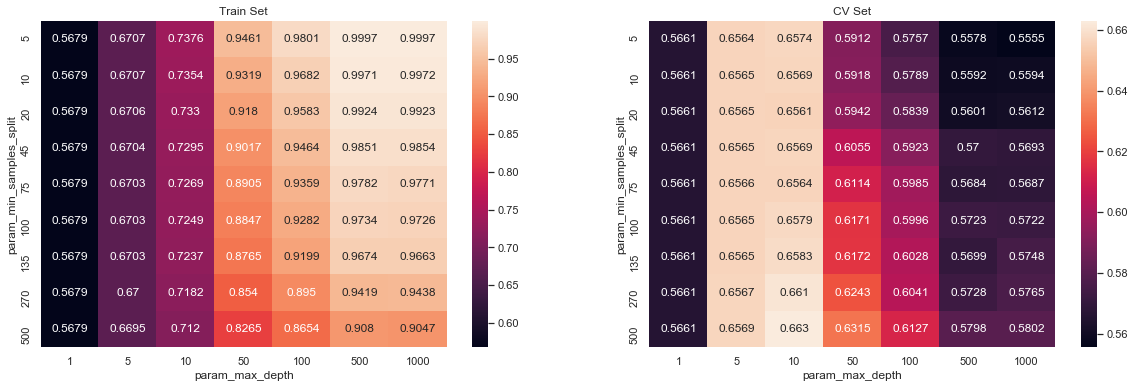

In [91]:
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [92]:
print(clf.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


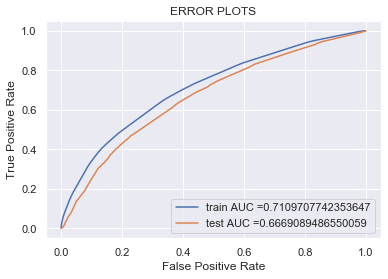

In [125]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
# # for visulation
clf1x = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf1.fit(X_train_merged, y_train)
# # for visulation
clf1x.fit(X_train_merged, y_train)

#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf1.predict_proba(X_train_merged) [:,1]
y_test_pred1 = clf1.predict_proba(X_test_merged) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [54]:
def predicted_Values(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.42 for threshold 0.47
the maximum value of tpr*(1-fpr) 0.4 for threshold 0.47


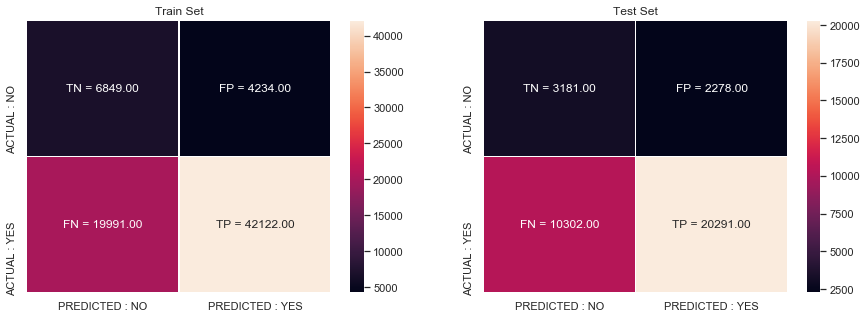

In [95]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
sns.set()
conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [83]:
#Feature aggregation
f1=vec1.get_feature_names()
f2=vec2.get_feature_names()
f3=vec3.get_feature_names()
f4=vec4.get_feature_names()
f5=vec5.get_feature_names()
f6=vec6.get_feature_names()
f7=vec7.get_feature_names()
f8=vec8.get_feature_names()
f9=vec9.get_feature_names()

feature_agg_bow = f1 + f2 + f3 + f4 + f5 + f6 + f7
feature_agg_tfidf = f1 + f2 + f3 + f4 + f5 + f8 + f9
# p is price, q is quantity, t is teacher previous year projects
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')
feature_agg_bow.append('quantity')
feature_agg_tfidf.append('quantity')
feature_agg_bow.append('teacher_previous_projects')
feature_agg_tfidf.append('teacher_previous_projects')

In [101]:
import pickle
if not os.path.isfile('clf1_bow.p'):
     pickle.dump(clf1,open('clf_bow.p','wb'))
else:
     clf1 = pickle.load(open('clf_bow.p','rb'))

In [81]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

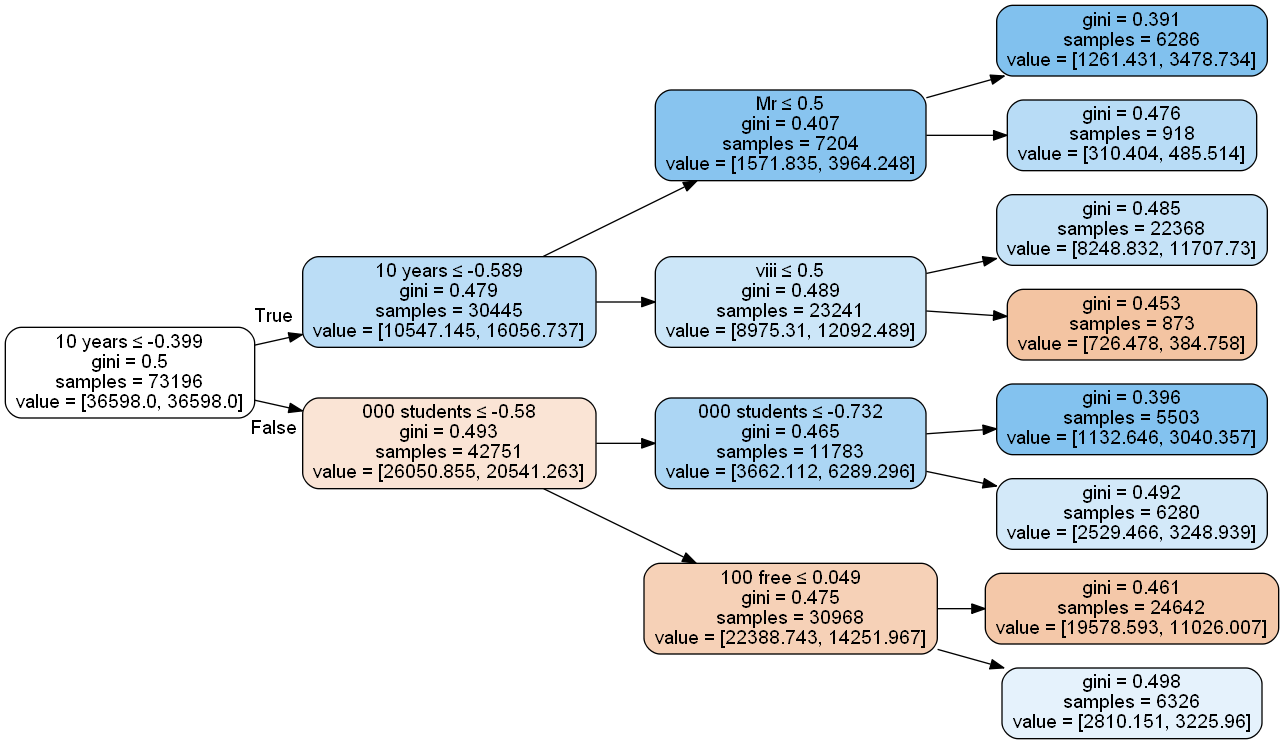

In [126]:
dot_data = StringIO()
export_graphviz(clf1x, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [127]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
false_pos_ind = []
for i in range(len(y_test)) :
     if (y_test[i] == 0) & (predictions1[i] == 1) :
        false_pos_ind.append(i)
fp_essay1 = []
for i in false_pos_ind:
     fp_essay1.append(X_test['essay'][i])

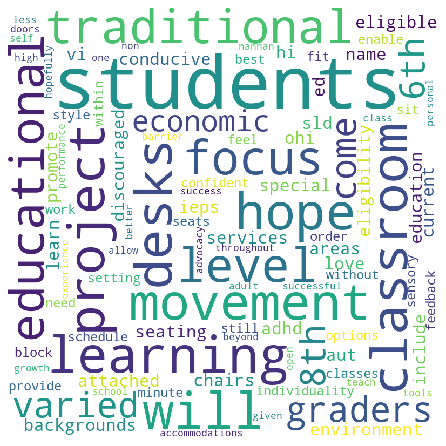

In [108]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
          val = str(val)
          tokens = val.split()
for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
for words in tokens :
          comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [109]:
# first get the columns:
columns = X_test_merged.columns
X_test_falsePos1 = pd.DataFrame(columns=columns)

# get the data of the false pisitives
for i in false_pos_ind : # (in fpi all the false positives data points indexes) 
     X_test_falsePos1 = X_test_falsePos1.append(X_test_merged.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

2278

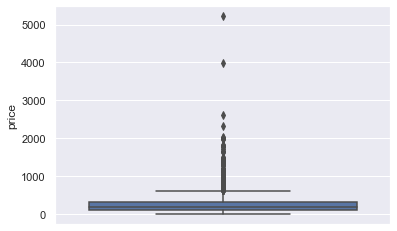

In [110]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

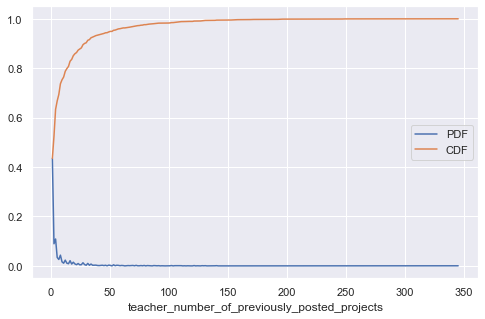

In [111]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

* ### $2.4.1$ Applying Decision Tree Classifier on TFIDF encoding <font color='yellow'>SET $2$</font>

In [61]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, \
                               teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, \
                               standardized_teacher_no_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test_merged_tfidf = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, \
                              teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, \
                              standardized_teacher_no_test, test_title_tfidf, test_essay_tfidf)).tocsr()

print("FINAL DATA MATRIX FOR TFIDF")
print(X_train_merged_tfidf.shape, y_train.shape)
print(X_test_merged_tfidf.shape, y_test.shape)

FINAL DATA MATRIX FOR TFIDF
(73196, 19220) (73196,)
(36052, 19220) (36052,)


In [113]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
decision_model = clf.fit(X_train_merged_tfidf, y_train)

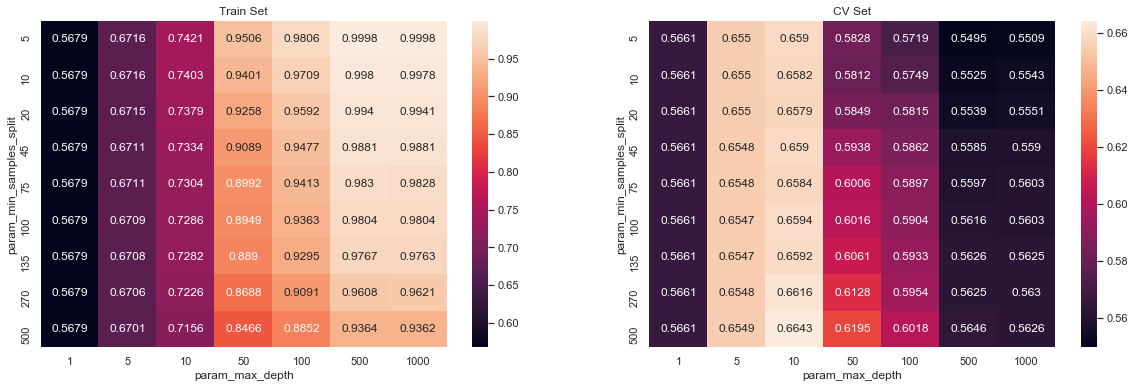

In [114]:
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [116]:
print(clf.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


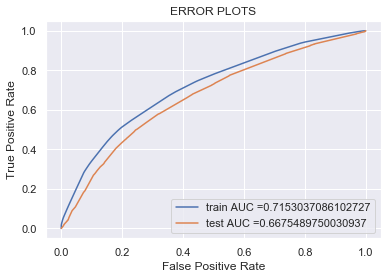

In [95]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf2x = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf2.fit(X_train_merged_tfidf, y_train)
clf2x.fit(X_train_merged_tfidf, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf2.predict_proba(X_train_merged_tfidf) [:,1]
y_test_pred1 = clf2.predict_proba(X_test_merged_tfidf) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [90]:
import pickle
if not os.path.isfile('clf_tfidf.p'):
     pickle.dump(clf2,open('clf_tfidf.p','wb'))
else:
     clf2 = pickle.load(open('clf_tfidf.p','rb'))

the maximum value of tpr*(1-fpr) 0.43 for threshold 0.44
the maximum value of tpr*(1-fpr) 0.4 for threshold 0.47


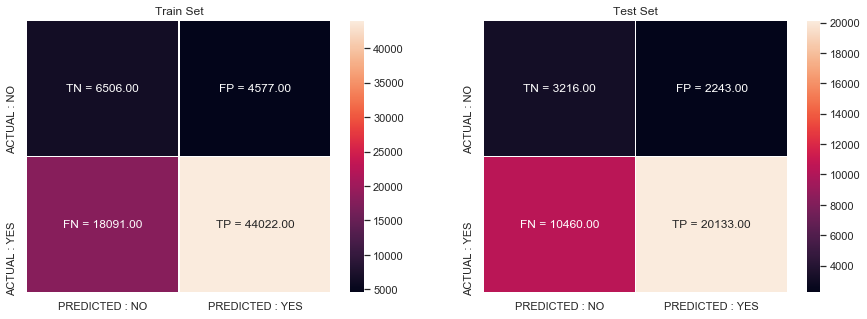

In [124]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
sns.set()
conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

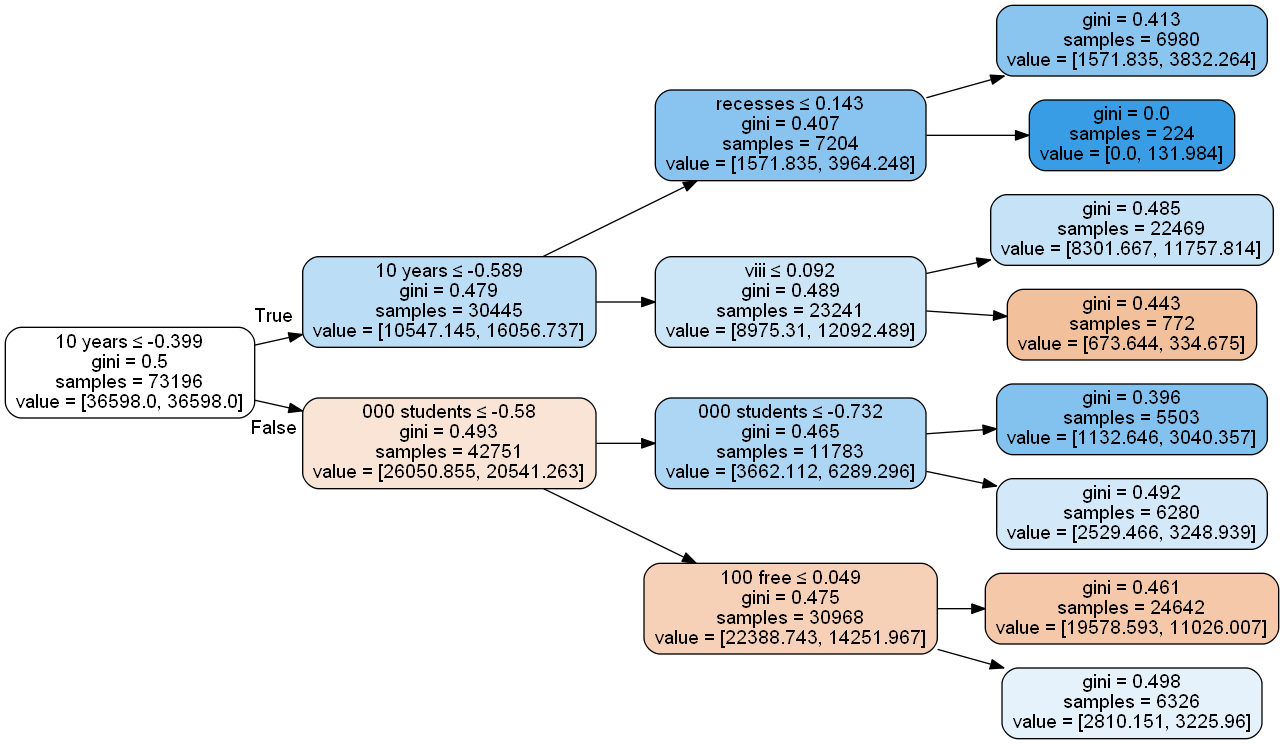

In [96]:
dot_data = StringIO()
export_graphviz(clf2x, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_tfidf,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [128]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
false_pos_ind = []
for i in range(len(y_test)) :
     if (y_test[i] == 0) & (predictions1[i] == 1) :
        false_pos_ind.append(i)
fp_essay2 = []
for i in false_pos_ind :
     fp_essay2.append(X_test['essay'].values[i])

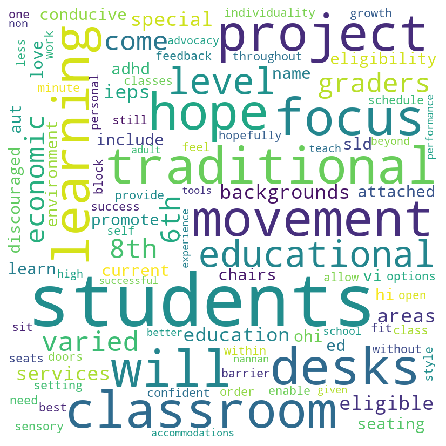

In [129]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay2 :
          val = str(val)
          tokens = val.split()
for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
for words in tokens :
          comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [132]:
# first get the columns:
columns = X_train.columns
X_test_falsePos1 = pd.DataFrame(columns=columns)

# get the data of the false pisitives
for i in false_pos_ind : # (in fpi all the false positives data points indexes) 
     X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

2243

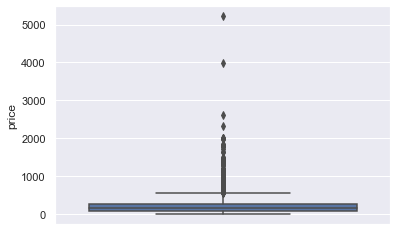

In [133]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

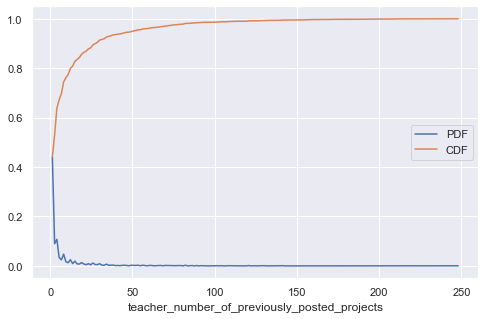

In [134]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

* ### $2.4.1$ Applying Decision Tree Classifier on W2V encoding,<font color='yellow'> SET $3$</font>

In [56]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train,\
                             grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, \
                             standardized_quantity_train, standardized_teacher_no_train, train_title_avg_w2v, \
                             train_essay_avg_w2v)).tocsr()
X_test_merged_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test,\
                            teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test,\
                            standardized_teacher_no_test, test_title_avg_w2v, test_essay_avg_w2v)).tocsr()

print("FINAL DATA MATRIX FOR AVG W2V")
print(X_train_merged_w2v.shape, y_train.shape)
print(X_test_merged_w2v.shape, y_test.shape)

FINAL DATA MATRIX FOR AVG W2V
(73196, 703) (73196,)
(36052, 703) (36052,)


In [57]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
decision_model = clf.fit(X_train_merged_w2v, y_train)

In [58]:
print(clf.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


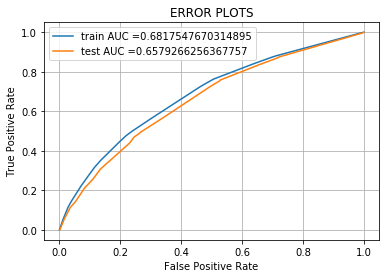

In [60]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf3 = clf.best_estimator_
clf3.fit(X_train_merged_w2v, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf3.predict_proba(X_train_merged_w2v) [:,1]
y_test_pred1 = clf3.predict_proba(X_test_merged_w2v) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [61]:
import pickle
if not os.path.isfile('clf_avgw2v.p'):
     pickle.dump(clf3,open('clf_avgw2v.p','wb'))
else:
     clf3 = pickle.load(open('clf_avgw2v.p','rb'))

the maximum value of tpr*(1-fpr) 0.39 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.51


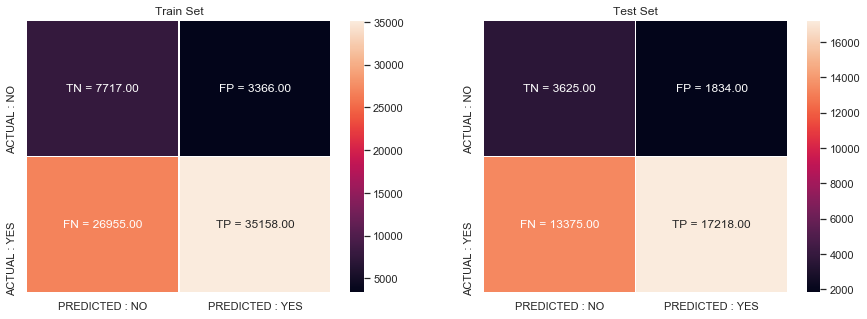

In [64]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
sns.set()
conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [65]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
false_pos_ind = []
for i in range(len(y_test)) :
     if (y_test[i] == 0) & (predictions1[i] == 1) :
        false_pos_ind.append(i)
fp_essay2 = []
for i in false_pos_ind :
     fp_essay2.append(X_test['essay'].values[i])

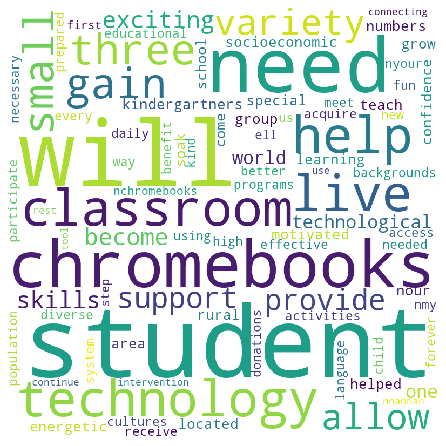

In [66]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay2 :
          val = str(val)
          tokens = val.split()
for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
for words in tokens :
          comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [67]:
# first get the columns:
columns = X_train.columns
X_test_falsePos1 = pd.DataFrame(columns=columns)

# get the data of the false pisitives
for i in false_pos_ind : # (in fpi all the false positives data points indexes) 
     X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

1834

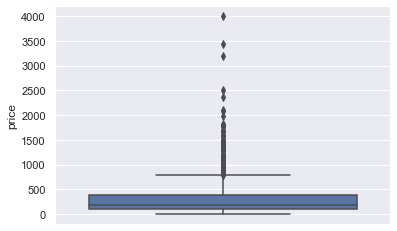

In [68]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

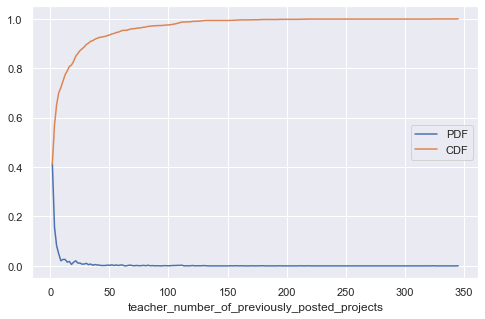

In [69]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

* ### $2.4.1$ Applying Decision Tree Classifier on TFIDF weighted W2V encoding,<font color='yellow'> SET $4$</font>

In [48]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train,\
                                   teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, \
                                   standardized_teacher_no_train, train_title_tfidf_w2v, train_essay_tfidf_w2v)).tocsr()
X_test_merged_tfidf_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, \
                                  teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, \
                                  standardized_teacher_no_test, test_title_tfidf_w2v, test_essay_tfidf_w2v)).tocsr()

print("FINAL DATA MATRIX FOR TFIDF WEIGHTED W2V")
print(X_train_merged_tfidf_w2v.shape, y_train.shape)
print(X_test_merged_tfidf_w2v.shape, y_test.shape)

FINAL DATA MATRIX FOR TFIDF WEIGHTED W2V
(73196, 703) (73196,)
(36052, 703) (36052,)


In [49]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
decision_model = clf.fit(X_train_merged_tfidf_w2v, y_train)

In [50]:
print(clf.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


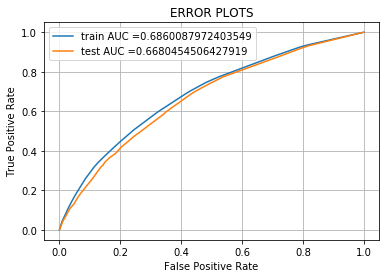

In [51]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf4 = clf.best_estimator_
clf4.fit(X_train_merged_tfidf_w2v, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf4.predict_proba(X_train_merged_tfidf_w2v) [:,1]
y_test_pred1 = clf4.predict_proba(X_test_merged_tfidf_w2v) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [52]:
import pickle
if not os.path.isfile('clf_tfidfw2v.p'):
     pickle.dump(clf4,open('clf_tfidfw2v.p','wb'))
else:
     clf4 = pickle.load(open('clf_tfidfw2v.p','rb'))

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.39 for threshold 0.54


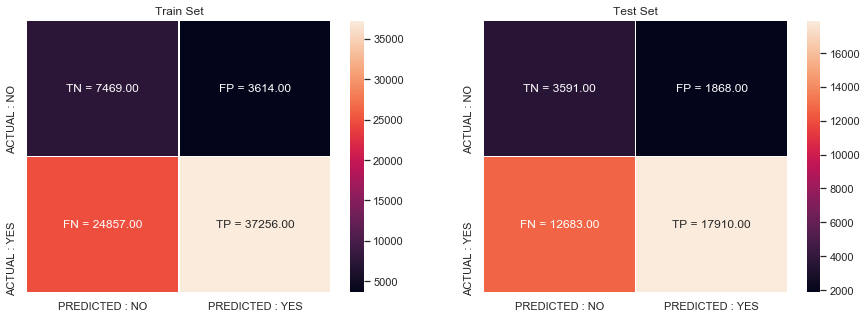

In [55]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
sns.set()
conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [56]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
false_pos_ind = []
for i in range(len(y_test)) :
     if (y_test[i] == 0) & (predictions1[i] == 1) :
        false_pos_ind.append(i)
fp_essay2 = []
for i in false_pos_ind :
     fp_essay2.append(X_test['essay'].values[i])

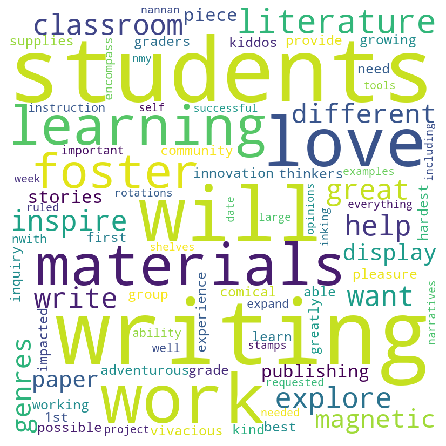

In [57]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay2 :
          val = str(val)
          tokens = val.split()
for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
for words in tokens :
          comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [58]:
# first get the columns:
columns = X_train.columns
X_test_falsePos1 = pd.DataFrame(columns=columns)

# get the data of the false pisitives
for i in false_pos_ind : # (in fpi all the false positives data points indexes) 
     X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

1868

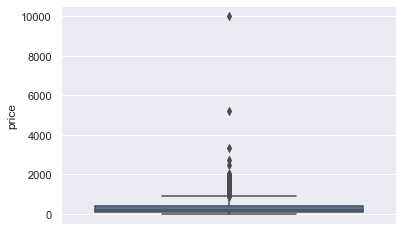

In [59]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

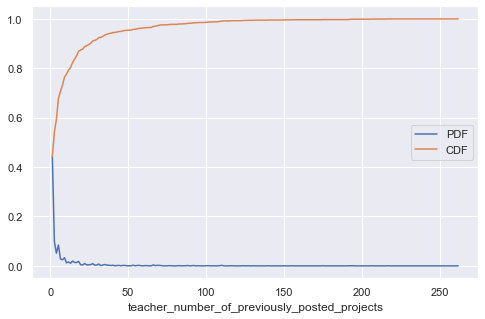

In [60]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1>[Task-2] </h1>

<ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>

In [66]:
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
    return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [67]:
# for tf-idf set 2
X_train_new = selectKImportance(clf2, X_train_merged_tfidf,5000)
X_test_new = selectKImportance(clf2, X_test_merged_tfidf, 5000)

print(X_train_new.shape)
print(X_test_new.shape)

(73196, 5000)
(36052, 5000)


In [68]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
decision_model = clf.fit(X_train_new, y_train)

In [69]:
print(clf.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


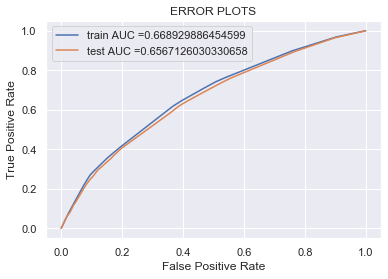

In [104]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf5 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf5x = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf5.fit(X_train_new, y_train)
clf5x.fit(X_train_new, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf5.predict_proba(X_train_new) [:,1]
y_test_pred1 = clf5.predict_proba(X_test_new) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [73]:
import pickle
if not os.path.isfile('clf_importance.p'):
     pickle.dump(clf5,open('clf_importance.p','wb'))
else:
     clf5 = pickle.load(open('clf_importance.p','rb'))

the maximum value of tpr*(1-fpr) 0.39 for threshold 0.55
the maximum value of tpr*(1-fpr) 0.38 for threshold 0.55


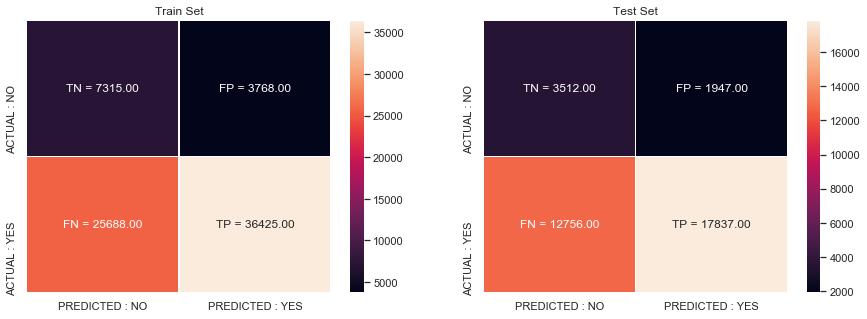

In [74]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
sns.set()
conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
            yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [122]:
indices = clf5.feature_importances_.argsort()[::-1][:5000].tolist()
feat_names = [feature_agg_tfidf[i] for i in indices]

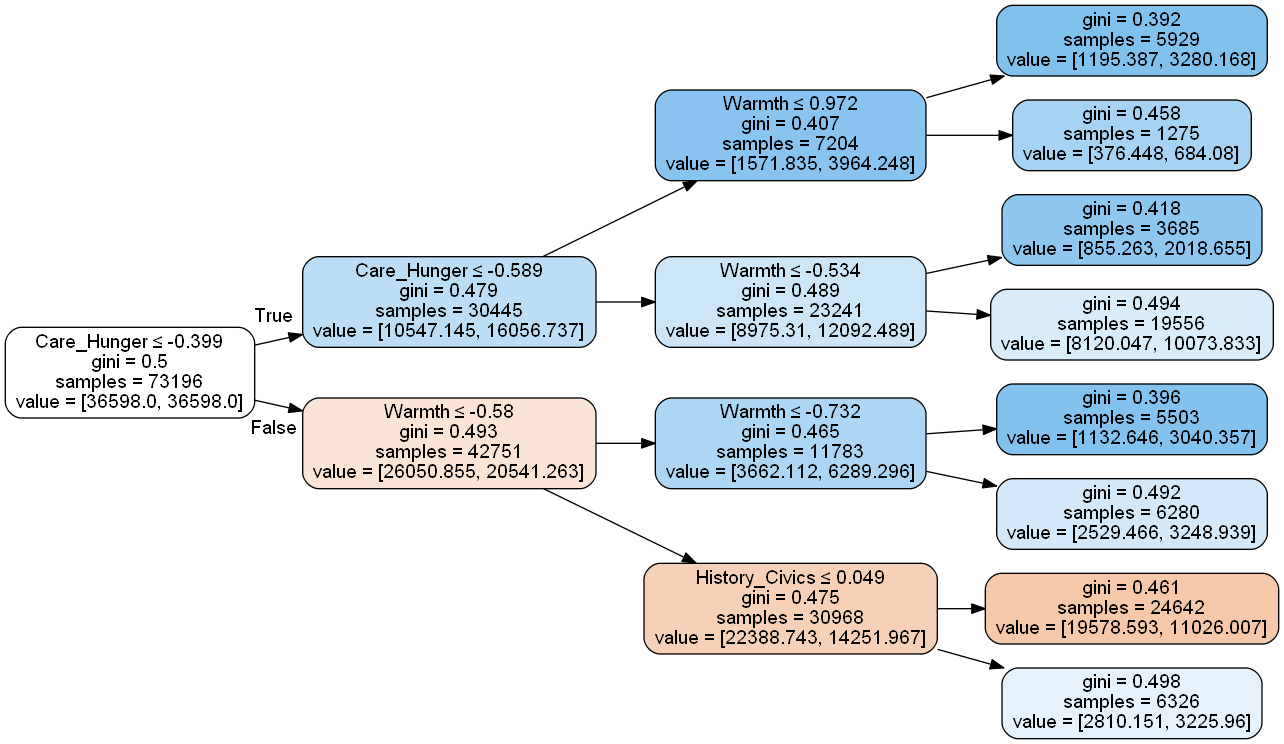

In [123]:
dot_data = StringIO()
export_graphviz(clf5x, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feat_names,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [75]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
false_pos_ind = []
for i in range(len(y_test)) :
     if (y_test[i] == 0) & (predictions1[i] == 1) :
        false_pos_ind.append(i)
fp_essay2 = []
for i in false_pos_ind :
     fp_essay2.append(X_test['essay'].values[i])

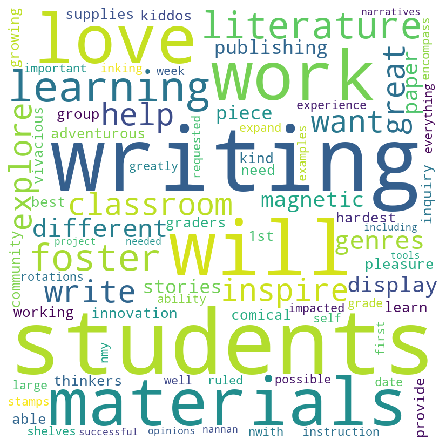

In [76]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay2 :
          val = str(val)
          tokens = val.split()
for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
for words in tokens :
          comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [77]:
# first get the columns:
columns = X_train.columns
X_test_falsePos1 = pd.DataFrame(columns=columns)

# get the data of the false pisitives
for i in false_pos_ind : # (in fpi all the false positives data points indexes) 
     X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

1947

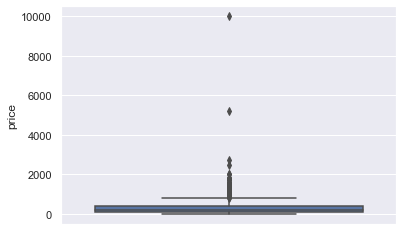

In [78]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

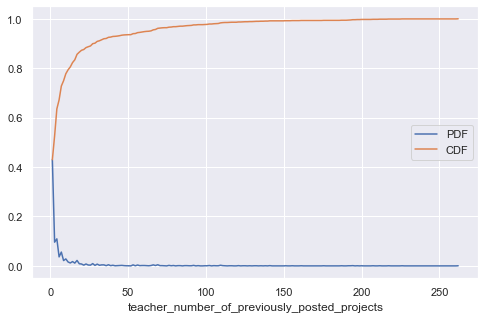

In [79]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

Observations and Conclusions

In [3]:
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Train-AUC "," Test-AUC ")
tb.add_row([" BOW ", 10, 500 , 0.7109 , 0.6669])
tb.add_row([" Tf-Idf", 10 , 500 , 0.7153 , 0.6675])
tb.add_row([" AVG-W2V", 5 , 500 , 0.6817 , 0.6579])
tb.add_row(["AVG-Tf-Idf", 5 , 500  , 0.6861 , 0.6681])
tb.add_row(["Top 5000 Features", 10 , 500 ,0.6689 , 0.6567 ])
print(tb.get_string(titles = "Decision trees- Observations")) 

+-------------------+-------------+--------------------+-------------+------------+
|     Vectorizer    |  Max_depth  |  Min_sample_split  |  Train-AUC  |  Test-AUC  |
+-------------------+-------------+--------------------+-------------+------------+
|        BOW        |      10     |        500         |    0.7109   |   0.6669   |
|       Tf-Idf      |      10     |        500         |    0.7153   |   0.6675   |
|       AVG-W2V     |      5      |        500         |    0.6817   |   0.6579   |
|     AVG-Tf-Idf    |      5      |        500         |    0.6861   |   0.6681   |
| Top 5000 Features |      10     |        500         |    0.6689   |   0.6567   |
+-------------------+-------------+--------------------+-------------+------------+


1. All the Decision Tree Models gives good Test Auc scores and are almost comparable(around 0.66)

2. The best score is given by tfidf vectorization in which top 5000 features are taken. The Test AUC score is 0.6567